# WORKING WITH RESULTANT DATA

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [18]:
ds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/final_data.csv')
ds.head()

,URLs,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,torcache.net,0,0,1,2,0,0,0,0,0,0,1,1,0,1,1,0,0
1,0,kenh14.vn,0,0,1,2,0,0,0,0,0,0,1,1,0,1,1,0,0
2,0,kakaku.com,0,0,1,6,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,kenh14.vn,0,0,1,2,0,0,0,0,0,0,1,1,0,1,1,0,0
4,0,plarium.com,0,0,1,5,0,0,0,0,0,0,1,1,1,1,1,1,0


UNDERSTANDING THE DATASET

In [19]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   URLs           3000 non-null   int64 
 1   Domain         3000 non-null   object
 2   Have_IP        3000 non-null   int64 
 3   Have_At        3000 non-null   int64 
 4   URL_Length     3000 non-null   int64 
 5   URL_Depth      3000 non-null   int64 
 6   Redirection    3000 non-null   int64 
 7   https_Domain   3000 non-null   int64 
 8   TinyURL        3000 non-null   int64 
 9   Prefix/Suffix  3000 non-null   int64 
 10  DNS_Record     3000 non-null   int64 
 11  Web_Traffic    3000 non-null   int64 
 12  Domain_Age     3000 non-null   int64 
 13  Domain_End     3000 non-null   int64 
 14  iFrame         3000 non-null   int64 
 15  Mouse_Over     3000 non-null   int64 
 16  Right_Click    3000 non-null   int64 
 17  Web_Forwards   3000 non-null   int64 
 18  Label          3000 non-null

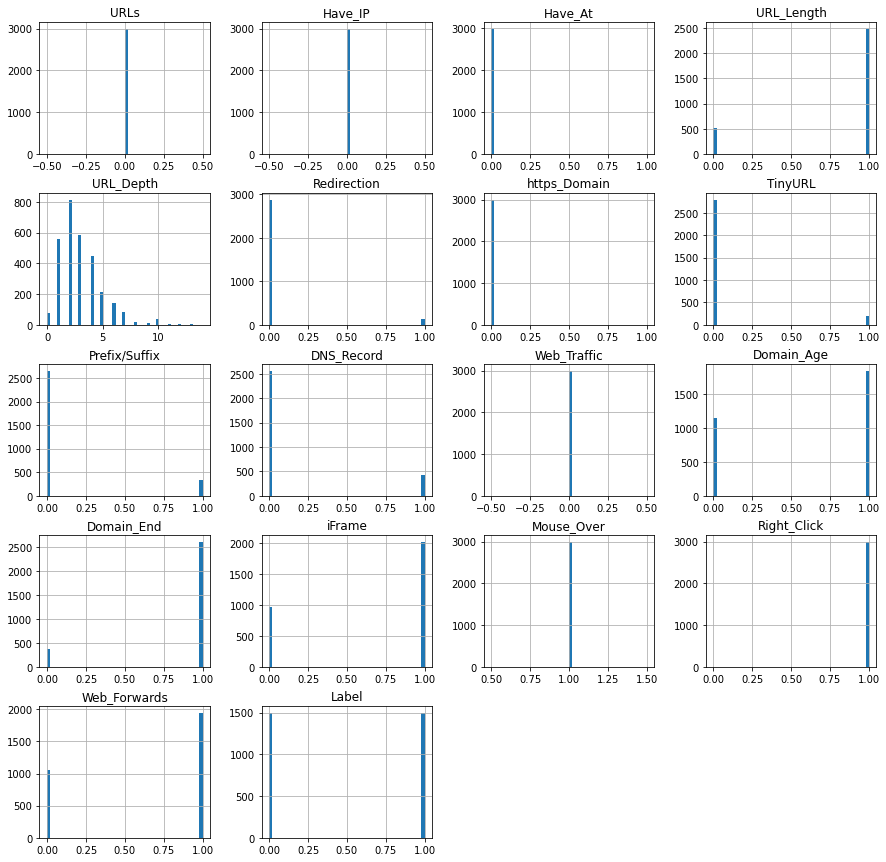

In [20]:
ds.hist(bins = 50,figsize = (15,15))
plt.show()

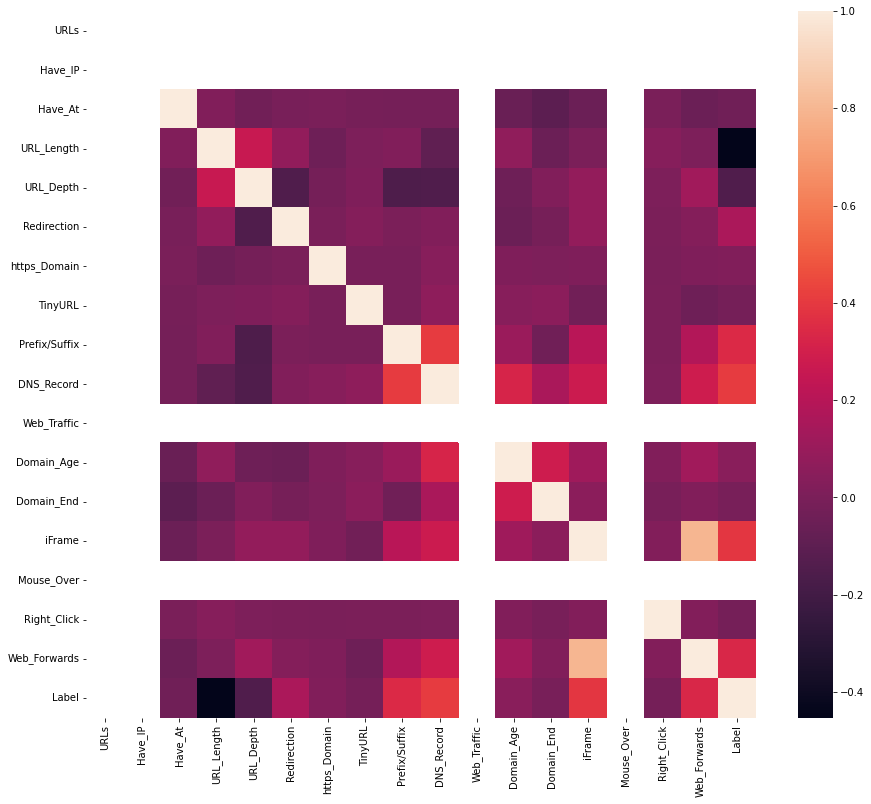

In [21]:
plt.figure(figsize=(15,13))
sns.heatmap(ds.corr())
plt.show()

In [22]:
dsph=ds.drop(['Domain','URLs'], axis = 1).copy()

In [23]:
dsph.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,3000.0,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000,3000.0,3000.000000,3000.000000,3000.000000
mean,0.0,0.002333,0.829667,3.007000,0.041667,0.000333,0.069333,0.114667,0.144333,0.0,0.616000,0.873333,0.675000,1.0,0.999667,0.650000,0.500000
std,0.0,0.048256,0.375988,1.951637,0.199860,0.018257,0.254062,0.318672,0.351486,0.0,0.486439,0.332655,0.468453,0.0,0.018257,0.477049,0.500083
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,1.0,1.000000,0.000000,0.000000
50%,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.500000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000
max,0.0,1.000000,1.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


In [24]:
dsph.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [25]:
data = dsph.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,1,1,2,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,3,0,0,0,0,0,0,1,1,1,1,1,1,1
2,0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1
3,0,0,1,3,0,0,0,0,0,0,0,1,1,1,1,1,0
4,0,0,1,3,0,0,0,0,0,0,1,1,0,1,1,0,0


In [26]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((3000, 16), (3000,))

Splitting the Data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((2400, 16), (600, 16))

#  Machine Learning Models

In [28]:
from sklearn.metrics import accuracy_score
     
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

## TRAINING OF THE MODELS

**DECISION TREE CLASSIFIER**

In [29]:
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [30]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [31]:
print(tree)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_tree))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_tree))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_tree))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_tree))


DecisionTreeClassifier(max_depth=5)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1198
           1       1.00      0.69      0.81      1202

    accuracy                           0.84      2400
   macro avg       0.88      0.84      0.84      2400
weighted avg       0.88      0.84      0.84      2400

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       302
           1       0.99      0.67      0.80       298

    accuracy                           0.83       600
   macro avg       0.87      0.83      0.83       600
weighted avg       0.87      0.83      0.83       600

Roc_auc score
-------------------------------------------------------
0.8339370638695052

Confusion matrix
-------------------------------------------------------


In [32]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.842
Decision Tree: Accuracy on test Data: 0.835


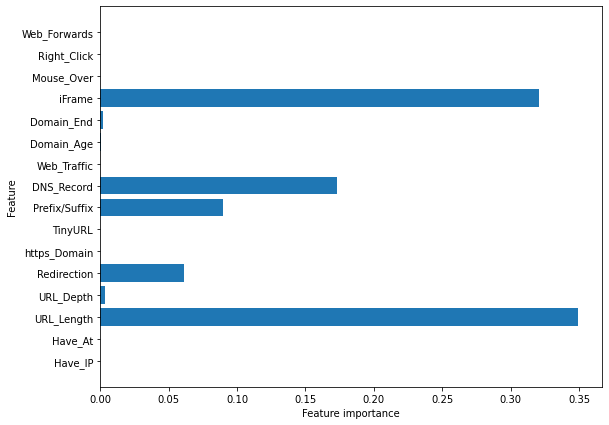

In [33]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [34]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

**RANDOM FOREST CLASSIFIER**

In [35]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)
 

RandomForestClassifier(max_depth=5)

In [36]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)
 

In [37]:
print(RandomForestClassifier)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_forest))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_forest))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_forest))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_forest))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      1198
           1       0.99      0.70      0.82      1202

    accuracy                           0.85      2400
   macro avg       0.88      0.85      0.84      2400
weighted avg       0.88      0.85      0.84      2400

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       302
           1       0.99      0.68      0.81       298

    accuracy                           0.84       600
   macro avg       0.87      0.84      0.83       600
weighted avg       0.87      0.84      0.83       600

Roc_auc score
-------------------------------------------------------
0.8372927685674919

Confusion matrix
----------------------------------

In [38]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
     

Random forest: Accuracy on training Data: 0.845
Random forest: Accuracy on test Data: 0.838


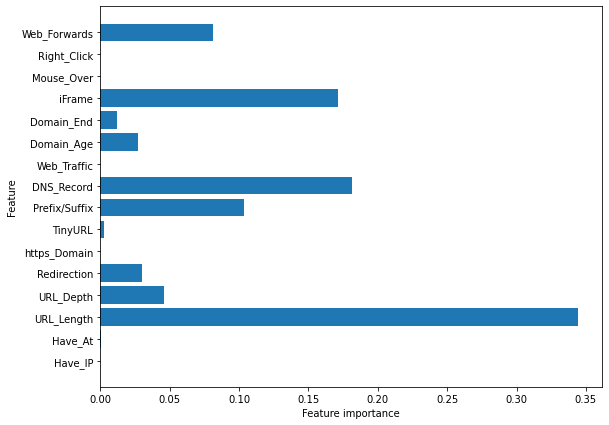

In [39]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [40]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)
     

** Multilayer Perceptron**


In [41]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [42]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)
     

In [43]:
print(mlp)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_mlp))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_mlp))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_mlp))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_mlp))


MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1198
           1       0.98      0.74      0.85      1202

    accuracy                           0.86      2400
   macro avg       0.89      0.86      0.86      2400
weighted avg       0.89      0.86      0.86      2400

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.99      0.87       302
           1       0.99      0.72      0.83       298

    accuracy                           0.86       600
   macro avg       0.89      0.86      0.85       600
weighted avg       0.89      0.86      0.85       600

Roc_auc score
-------------------------------------------------------
0.855749144406418

Confusion matrix
------------------------------

In [44]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
    

Multilayer Perceptrons: Accuracy on training Data: 0.864
Multilayer Perceptrons: Accuracy on test Data: 0.857


In [45]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)
     

**XGBoost Classification**

In [46]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.1,max_depth=9)
#fit the model
xgb.fit(X_train, y_train)
     

XGBClassifier(max_depth=9)

In [47]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [48]:
print(XGBClassifier)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_xgb))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_xgb))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_xgb))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_xgb))


<class 'xgboost.sklearn.XGBClassifier'>
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1198
           1       0.97      0.78      0.87      1202

    accuracy                           0.88      2400
   macro avg       0.90      0.88      0.88      2400
weighted avg       0.90      0.88      0.88      2400

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       302
           1       0.97      0.76      0.85       298

    accuracy                           0.87       600
   macro avg       0.89      0.87      0.87       600
weighted avg       0.89      0.87      0.87       600

Roc_auc score
-------------------------------------------------------
0.8692608560380461

Confusion matrix
----------------------------------------------------

In [49]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
     

XGBoost: Accuracy on training Data: 0.881
XGBoost : Accuracy on test Data: 0.870


In [50]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)
     

Support vector machine model

In [51]:

from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [52]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)
     

In [53]:
print(svm)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_svm))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_svm))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_svm))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_svm))


SVC(kernel='linear', random_state=12)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      1198
           1       0.95      0.74      0.83      1202

    accuracy                           0.85      2400
   macro avg       0.87      0.85      0.85      2400
weighted avg       0.87      0.85      0.85      2400

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.86       302
           1       0.95      0.73      0.83       298

    accuracy                           0.85       600
   macro avg       0.87      0.85      0.85       600
weighted avg       0.87      0.85      0.85       600

Roc_auc score
-------------------------------------------------------
0.847582114760656

Confusion matrix
-------------------------------------------------------

In [54]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))
     

SVM: Accuracy on training Data: 0.849
SVM : Accuracy on test Data: 0.848


In [55]:
storeResults('SVM', acc_train_svm, acc_test_svm)
     

**KNeighborsClassifier**

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knmodel = KNeighborsClassifier()
knmodel.fit(X_train, y_train)
y_train_kn = knmodel.predict(X_train)
y_test_kn = knmodel.predict(X_test)
print(knmodel)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_kn))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_kn))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_kn))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_kn))


KNeighborsClassifier()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1198
           1       0.95      0.77      0.85      1202

    accuracy                           0.86      2400
   macro avg       0.88      0.86      0.86      2400
weighted avg       0.88      0.86      0.86      2400

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       302
           1       0.95      0.73      0.83       298

    accuracy                           0.85       600
   macro avg       0.87      0.85      0.85       600
weighted avg       0.87      0.85      0.85       600

Roc_auc score
-------------------------------------------------------
0.849237743899729

Confusion matrix
-------------------------------------------------------
[[291  11]
 [ 

In [58]:
acc_train_kn = accuracy_score(y_train,y_train_kn)
acc_test_kn = accuracy_score(y_test,y_test_kn)

print("KN: Accuracy on training Data: {:.3f}".format(acc_train_kn))
print("KN: Accuracy on test Data: {:.3f}".format(acc_test_kn))
     

KN: Accuracy on training Data: 0.865
KN: Accuracy on test Data: 0.850


In [60]:
storeResults('KN', acc_train_kn, acc_test_kn)
     

**ExtraTreesClassifier**

In [61]:
from sklearn.ensemble import ExtraTreesClassifier

ETCmodel = ExtraTreesClassifier(random_state=123)
ETCmodel.fit(X_train, y_train)
y_train_et = ETCmodel.predict(X_train)
y_test_et = ETCmodel.predict(X_test)

print(ETCmodel)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_et))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_et))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_et))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_et))

ExtraTreesClassifier(random_state=123)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1198
           1       0.97      0.79      0.87      1202

    accuracy                           0.88      2400
   macro avg       0.90      0.88      0.88      2400
weighted avg       0.90      0.88      0.88      2400

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       302
           1       0.97      0.77      0.85       298

    accuracy                           0.87       600
   macro avg       0.89      0.87      0.87       600
weighted avg       0.89      0.87      0.87       600

Roc_auc score
-------------------------------------------------------
0.8693053024578871

Confusion matrix
-----------------------------------------------------

In [62]:
acc_train_et = accuracy_score(y_train,y_train_et)
acc_test_et = accuracy_score(y_test,y_test_et)

print("ET: Accuracy on training Data: {:.3f}".format(acc_train_et))
print("ET: Accuracy on test Data: {:.3f}".format(acc_test_et))

ET: Accuracy on training Data: 0.884
ET: Accuracy on test Data: 0.870


In [63]:
storeResults('ETC', acc_train_et, acc_test_et)
     

## COMPARING THE MODELS

In [64]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results
     

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.842,0.835
1,Random Forest,0.845,0.838
2,Multilayer Perceptrons,0.864,0.857
3,XGBoost,0.881,0.870
4,SVM,0.849,0.848
5,KN,0.865,0.850
6,ETC,0.884,0.870


In [65]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)
 

,ML Model,Train Accuracy,Test Accuracy
6,ETC,0.884,0.870
3,XGBoost,0.881,0.870
2,Multilayer Perceptrons,0.864,0.857
5,KN,0.865,0.850
4,SVM,0.849,0.848
1,Random Forest,0.845,0.838
0,Decision Tree,0.842,0.835


# HYPERPARAMETER TUNING

In [68]:
from sklearn.model_selection import GridSearchCV, KFold
params = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu','softmax'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.01, 0.05,0.1],
    'learning_rate': ['constant','adaptive'],
}
gs1 =  GridSearchCV( MLPClassifier(max_iter=100), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs1.fit(X_train, y_train)

print('Best score:', gs1.best_score_)
print('Best score:', gs1.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
96 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
96 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 427, in _fit
    self._fit_stochastic(
  File "/usr/l

Best score: 0.9312667749060805
Best score: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [69]:

params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear'],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [0.5, 1, 5],
    'base_score': [0.2, 0.5, 1]
}

gs2 = GridSearchCV(XGBClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs2.fit(X_train, y_train)

print('Best score:', gs2.best_score_)
print('Best score:', gs2.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1458 fits failed out of a total of 4374.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py", line 728, in fit
    self._Booster = train(xgb_options, train_dmatrix, self.get_num_boosting_rounds(),
  File "/usr/local/lib/python3.8/dist-packages/xgboost/training.py", line 212, in train
    return _train_internal(params, dtrain,
  File "/usr

Best score: 0.9378496945477547
Best score: {'base_score': 0.2, 'booster': 'gbtree', 'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 500, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [70]:
params = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [1,2,4,5],
    'min_samples_leaf': [1,2,4,5],
    'max_leaf_nodes': [4,10,20,50,None]
}

gs3 = GridSearchCV(ExtraTreesClassifier(n_jobs=-1), params, n_jobs=-1, cv=KFold(n_splits=3), scoring='roc_auc')
gs3.fit(X_train, y_train)

print('Best score:', gs3.best_score_)
print('Best score:', gs3.best_params_)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1098, in __call__
    self.retrieve()
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 975, in retrie

Best score: 0.9396847991944283
Best score: {'criterion': 'gini', 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


## ENSEMBLE MODEL

In [71]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

votes = [
    ('mlp', gs1.best_estimator_),
    ('xgb', gs2.best_estimator_),
    ('xt', gs3.best_estimator_)
]

# soft voting based on weights
votesClass = VotingClassifier(estimators=votes, voting='soft', n_jobs=-1)
votesClass_cv = cross_validate(votesClass, X_train, y_train, cv=KFold(n_splits=3))
votesClass.fit(X_train, y_train)

votesClass_cv


{'fit_time': array([1.26642299, 1.23219728, 1.24023175]),
 'score_time': array([0.09747481, 0.08485913, 0.08690739]),
 'test_score': array([0.87875, 0.8575 , 0.86375])}

In [72]:
from sklearn.ensemble import ExtraTreesClassifier

model = votesClass
model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_train, y_train_hat))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_hat))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_test_hat))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_test_hat))

VotingClassifier(estimators=[('mlp',
                              MLPClassifier(alpha=0.1,
                                            hidden_layer_sizes=(10, 30, 10),
                                            max_iter=100)),
                             ('xgb',
                              XGBClassifier(base_score=0.2, n_estimators=500,
                                            n_jobs=-1, reg_lambda=0.5)),
                             ('xt',
                              ExtraTreesClassifier(max_leaf_nodes=50,
                                                   min_samples_split=4,
                                                   n_estimators=200,
                                                   n_jobs=-1))],
                 n_jobs=-1, voting='soft')
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1198
           1       0.97      0.78      0.86  

In [74]:
acc_train_hat = accuracy_score(y_train,y_train_hat)
acc_test_hat = accuracy_score(y_test,y_test_hat)

print("VOTE: Accuracy on training Data: {:.3f}".format(acc_train_hat))
print("VOTE: Accuracy on test Data: {:.3f}".format(acc_test_hat))

VOTE: Accuracy on training Data: 0.877
VOTE: Accuracy on test Data: 0.868


In [75]:
print("VOTE: Accuracy on training Data: {:.3f}".format(acc_train_hat))
print("VOTE : Accuracy on test Data: {:.3f}".format(acc_test_hat))

VOTE: Accuracy on training Data: 0.877
VOTE : Accuracy on test Data: 0.868


SAVING AND TESTING THE MODEL

In [76]:
import pickle
pickle.dump(gs2, open("XGBoostClassifier.pickle.dat", "wb"))

# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model
     

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(missing=nan, n_jobs=-1), n_jobs=-1,
             param_grid={'base_score': [0.2, 0.5, 1],
                         'booster': ['gbtree', 'gblinear'],
                         'gamma': [0, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500],
                         'reg_alpha': [0, 0.5, 1], 'reg_lambda': [0.5, 1, 5]},
             scoring='roc_auc')